<h3> Richa Phulwani - OLA 3 </h3>

<h4> Problem 1 </h4>

In [67]:
import pandas
import numpy as np

In [1]:
data = np.array(pandas.read_table("https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/iris-data.txt",delim_whitespace=True,header=None))

In [2]:
X = data[:,0:4]
X.shape

(150, 4)

In [3]:
labels = data[:,4]

In [4]:
import keras
Y = keras.utils.to_categorical(labels,len(np.unique(labels)))

Using TensorFlow backend.


In [35]:
model = keras.Sequential()

In [36]:
input_size = X.shape[1]
output_size = Y.shape[1]
model.add(keras.layers.Dense(output_size,activation='sigmoid',input_shape=[input_size]))

In [37]:
model.compile(loss=keras.losses.mse,optimizer=keras.optimizers.SGD(lr=0.05),metrics=['accuracy'])

In [38]:
model.predict(X[0:5,:])

array([[0.13795485, 0.85699797, 0.98908967],
       [0.16526714, 0.9370867 , 0.99618995],
       [0.15023924, 0.9365326 , 0.9980842 ],
       [0.13749689, 0.90146786, 0.9904456 ],
       [0.0753902 , 0.7893428 , 0.9577341 ]], dtype=float32)

In [39]:
output_layer_neti = np.dot(np.float32(X[0:5,:]),model.get_weights()[0])+model.get_weights()[1]
output_layer_neti

array([[-1.8323812,  1.7905769,  4.5070753],
       [-1.6195486,  2.7010183,  5.5663147],
       [-1.7327259,  2.691658 ,  6.255683 ],
       [-1.8362374,  2.2136414,  4.641162 ],
       [-2.5066946,  1.3209687,  3.1205895]], dtype=float32)

In [40]:
1.0 / (1.0 + np.exp(-1.0 * output_layer_neti))

array([[0.13795485, 0.85699797, 0.98908967],
       [0.16526714, 0.9370867 , 0.99618995],
       [0.15023924, 0.9365326 , 0.9980842 ],
       [0.13749689, 0.90146786, 0.9904456 ],
       [0.0753902 , 0.7893428 , 0.9577341 ]], dtype=float32)

In [41]:
weights = model.get_weights()[0]
bias_weights = model.get_weights()[1]
print(weights)
print(bias_weights)

[[-0.40939122 -0.46344644  0.45063925]
 [-0.21908915  0.7463629   0.02760482]
 [ 0.06977051  0.5093701   0.56956613]
 [ 0.7179365   0.39736927 -0.33539432]]
[0. 0. 0.]


In [42]:
output_neti = np.dot(np.float32(X[0:1]),weights)+bias_weights
output_neti

array([[-1.8323812,  1.7905769,  4.5070753]], dtype=float32)

In [43]:
output_acts = 1.0 / (1.0 + np.exp(-output_neti))
output_acts

array([[0.13795485, 0.85699797, 0.98908967]], dtype=float32)

In [44]:
model.predict(X[0:1])

array([[0.13795485, 0.85699797, 0.98908967]], dtype=float32)

In [45]:
error = output_acts - np.float32(Y[0:1])
error

array([[ 0.13795485, -0.14300203,  0.98908967]], dtype=float32)

In [46]:
deriv = 2.0 * np.exp(-output_neti) / np.power(1.0+np.exp(-output_neti),2.0)
deriv

array([[0.23784661, 0.24510483, 0.02158258]], dtype=float32)

In [47]:
deltas = error*deriv*(1.0/len(bias_weights))
deltas

array([[ 0.01093736, -0.0116835 ,  0.0071157 ]], dtype=float32)

In [48]:
w_updates = np.outer(np.float32(X[0:1]),deltas)
w_updates

array([[ 0.06343672, -0.06776428,  0.04127108],
       [ 0.02953088, -0.03154544,  0.0192124 ],
       [ 0.04265573, -0.04556564,  0.02775124],
       [ 0.01312484, -0.0140202 ,  0.00853884]], dtype=float32)

In [49]:
w_updates = np.outer(np.float32(X[0:1]),deltas)
w_updates

array([[ 0.06343672, -0.06776428,  0.04127108],
       [ 0.02953088, -0.03154544,  0.0192124 ],
       [ 0.04265573, -0.04556564,  0.02775124],
       [ 0.01312484, -0.0140202 ,  0.00853884]], dtype=float32)

In [50]:
weights

array([[-0.40939122, -0.46344644,  0.45063925],
       [-0.21908915,  0.7463629 ,  0.02760482],
       [ 0.06977051,  0.5093701 ,  0.56956613],
       [ 0.7179365 ,  0.39736927, -0.33539432]], dtype=float32)

In [51]:
eta = np.float32(0.001)

In [52]:
weights - eta*w_updates

array([[-0.40945467, -0.46337867,  0.45059797],
       [-0.21911868,  0.74639446,  0.02758561],
       [ 0.06972786,  0.5094156 ,  0.56953835],
       [ 0.7179234 ,  0.39738327, -0.33540288]], dtype=float32)

In [53]:
bias_weights

array([0., 0., 0.], dtype=float32)

In [54]:
bias_weights - eta*deltas

array([[-1.0937365e-05,  1.1683497e-05, -7.1157028e-06]], dtype=float32)

In [55]:
history = model.fit(X[0:1],Y[0:1],batch_size=1,epochs=1,verbose=0)
model.get_weights()

[array([[-0.41256306, -0.4600582 ,  0.4485757 ],
        [-0.22056569,  0.7479402 ,  0.0266442 ],
        [ 0.06763773,  0.51164836,  0.5681786 ],
        [ 0.71728027,  0.39807028, -0.33582127]], dtype=float32),
 array([-0.00054687,  0.00058418, -0.00035579], dtype=float32)]

In [56]:
batch_size = 16
epochs = 100
validation_split = 0.5
history = model.fit(X, Y,
batch_size = batch_size,
epochs = epochs,
verbose = 1,
validation_split = validation_split)

Train on 75 samples, validate on 75 samples
Epoch 1/100
75/75 [==============================] - 0s 2ms/step - loss: 0.4745 - acc: 0.3333 - val_loss: 0.4437 - val_acc: 0.3333
Epoch 2/100
75/75 [==============================] - 0s 738us/step - loss: 0.4485 - acc: 0.3333 - val_loss: 0.4155 - val_acc: 0.3333
Epoch 3/100
75/75 [==============================] - 0s 382us/step - loss: 0.4194 - acc: 0.3333 - val_loss: 0.3922 - val_acc: 0.3333
Epoch 4/100
75/75 [==============================] - 0s 615us/step - loss: 0.3964 - acc: 0.3333 - val_loss: 0.3795 - val_acc: 0.3333
Epoch 5/100
75/75 [==============================] - 0s 605us/step - loss: 0.3825 - acc: 0.3333 - val_loss: 0.3723 - val_acc: 0.3333
Epoch 6/100
75/75 [==============================] - 0s 409us/step - loss: 0.3729 - acc: 0.3333 - val_loss: 0.3651 - val_acc: 0.3333
Epoch 7/100
75/75 [==============================] - 0s 453us/step - loss: 0.3633 - acc: 0.3333 - val_loss: 0.3546 - val_acc: 0.3333
Epoch 8/100
75/75 [========

In [57]:
batch_size = 16
epochs = 100
validation_split = 0.3
# Train the model and record the training
# history for later examination
history = model.fit(X, Y,
batch_size = batch_size,
epochs = epochs,
verbose = 1,
validation_split = validation_split)

Train on 105 samples, validate on 45 samples
Epoch 1/100
105/105 [==============================] - 0s 453us/step - loss: 0.1167 - acc: 0.7143 - val_loss: 0.1585 - val_acc: 0.5556
Epoch 2/100
105/105 [==============================] - 0s 348us/step - loss: 0.1163 - acc: 0.7143 - val_loss: 0.1572 - val_acc: 0.5556
Epoch 3/100
105/105 [==============================] - 0s 206us/step - loss: 0.1161 - acc: 0.7143 - val_loss: 0.1559 - val_acc: 0.5556
Epoch 4/100
105/105 [==============================] - 0s 244us/step - loss: 0.1155 - acc: 0.7143 - val_loss: 0.1544 - val_acc: 0.5556
Epoch 5/100
105/105 [==============================] - 0s 452us/step - loss: 0.1154 - acc: 0.7238 - val_loss: 0.1566 - val_acc: 0.5556
Epoch 6/100
105/105 [==============================] - 0s 231us/step - loss: 0.1153 - acc: 0.7143 - val_loss: 0.1551 - val_acc: 0.5556
Epoch 7/100
105/105 [==============================] - 0s 248us/step - loss: 0.1145 - acc: 0.7143 - val_loss: 0.1550 - val_acc: 0.5556
Epoch 8/10

In [58]:
batch_size = 16
epochs = 100
validation_split = 0.5
# Train the model and record the training
# history for later examination
history = model.fit(X, Y,
batch_size = batch_size,
epochs = epochs,
verbose = 1,
validation_split = validation_split)

Train on 75 samples, validate on 75 samples
Epoch 1/100
75/75 [==============================] - 0s 709us/step - loss: 0.1029 - acc: 0.6933 - val_loss: 0.1159 - val_acc: 0.6667
Epoch 2/100
75/75 [==============================] - 0s 306us/step - loss: 0.1019 - acc: 0.7333 - val_loss: 0.1159 - val_acc: 0.6667
Epoch 3/100
75/75 [==============================] - 0s 239us/step - loss: 0.1014 - acc: 0.7333 - val_loss: 0.1156 - val_acc: 0.6667
Epoch 4/100
75/75 [==============================] - 0s 499us/step - loss: 0.1018 - acc: 0.7067 - val_loss: 0.1151 - val_acc: 0.6800
Epoch 5/100
75/75 [==============================] - 0s 590us/step - loss: 0.1017 - acc: 0.7867 - val_loss: 0.1152 - val_acc: 0.6667
Epoch 6/100
75/75 [==============================] - 0s 273us/step - loss: 0.1016 - acc: 0.7467 - val_loss: 0.1152 - val_acc: 0.6800
Epoch 7/100
75/75 [==============================] - 0s 271us/step - loss: 0.1017 - acc: 0.7600 - val_loss: 0.1150 - val_acc: 0.6800
Epoch 8/100
75/75 [======

In [59]:
batch_size = 16
epochs = 50
validation_split = 0.5
# Train the model and record the training
# history for later examination
history = model.fit(X, Y,
batch_size = batch_size,
epochs = epochs,
verbose = 1,
validation_split = validation_split)

Train on 75 samples, validate on 75 samples
Epoch 1/50
75/75 [==============================] - 0s 372us/step - loss: 0.0946 - acc: 0.9067 - val_loss: 0.1091 - val_acc: 0.7467
Epoch 2/50
75/75 [==============================] - 0s 333us/step - loss: 0.0945 - acc: 0.9200 - val_loss: 0.1094 - val_acc: 0.7200
Epoch 3/50
75/75 [==============================] - 0s 333us/step - loss: 0.0949 - acc: 0.8533 - val_loss: 0.1090 - val_acc: 0.7467
Epoch 4/50
75/75 [==============================] - 0s 373us/step - loss: 0.0953 - acc: 0.9067 - val_loss: 0.1088 - val_acc: 0.7467
Epoch 5/50
75/75 [==============================] - 0s 253us/step - loss: 0.0944 - acc: 0.9333 - val_loss: 0.1091 - val_acc: 0.7200
Epoch 6/50
75/75 [==============================] - 0s 588us/step - loss: 0.0942 - acc: 0.8667 - val_loss: 0.1091 - val_acc: 0.7200
Epoch 7/50
75/75 [==============================] - 0s 577us/step - loss: 0.0944 - acc: 0.9067 - val_loss: 0.1089 - val_acc: 0.7333
Epoch 8/50
75/75 [==============

In [60]:
batch_size = 16
epochs = 25
validation_split = 0.5
# Train the model and record the training
# history for later examination
history = model.fit(X, Y,
batch_size = batch_size,
epochs = epochs,
verbose = 1,
validation_split = validation_split)

Train on 75 samples, validate on 75 samples
Epoch 1/25
75/75 [==============================] - 0s 257us/step - loss: 0.0925 - acc: 0.9200 - val_loss: 0.1069 - val_acc: 0.7333
Epoch 2/25
75/75 [==============================] - 0s 202us/step - loss: 0.0929 - acc: 0.9200 - val_loss: 0.1065 - val_acc: 0.7600
Epoch 3/25
75/75 [==============================] - 0s 298us/step - loss: 0.0917 - acc: 0.9200 - val_loss: 0.1065 - val_acc: 0.7467
Epoch 4/25
75/75 [==============================] - 0s 248us/step - loss: 0.0920 - acc: 0.9333 - val_loss: 0.1068 - val_acc: 0.7333
Epoch 5/25
75/75 [==============================] - 0s 470us/step - loss: 0.0916 - acc: 0.9200 - val_loss: 0.1065 - val_acc: 0.7333
Epoch 6/25
75/75 [==============================] - 0s 175us/step - loss: 0.0921 - acc: 0.8667 - val_loss: 0.1061 - val_acc: 0.7733
Epoch 7/25
75/75 [==============================] - 0s 254us/step - loss: 0.0926 - acc: 0.9333 - val_loss: 0.1064 - val_acc: 0.7333
Epoch 8/25
75/75 [==============

In [61]:
batch_size = 16
epochs = 10
validation_split = 0.4
# Train the model and record the training
# history for later examination
history = model.fit(X, Y,
batch_size = batch_size,
epochs = epochs,
verbose = 1,
validation_split = validation_split)

Train on 90 samples, validate on 60 samples
Epoch 1/10
90/90 [==============================] - 0s 340us/step - loss: 0.0899 - acc: 0.9333 - val_loss: 0.1112 - val_acc: 0.7000
Epoch 2/10
90/90 [==============================] - 0s 256us/step - loss: 0.0898 - acc: 0.9111 - val_loss: 0.1127 - val_acc: 0.6833
Epoch 3/10
90/90 [==============================] - 0s 305us/step - loss: 0.0896 - acc: 0.8222 - val_loss: 0.1121 - val_acc: 0.6833
Epoch 4/10
90/90 [==============================] - 0s 191us/step - loss: 0.0896 - acc: 0.8667 - val_loss: 0.1122 - val_acc: 0.6833
Epoch 5/10
90/90 [==============================] - 0s 312us/step - loss: 0.0902 - acc: 0.8556 - val_loss: 0.1123 - val_acc: 0.6833
Epoch 6/10
90/90 [==============================] - 0s 642us/step - loss: 0.0893 - acc: 0.8444 - val_loss: 0.1123 - val_acc: 0.6833
Epoch 7/10
90/90 [==============================] - 0s 376us/step - loss: 0.0899 - acc: 0.7778 - val_loss: 0.1113 - val_acc: 0.7000
Epoch 8/10
90/90 [==============

In [62]:
batch_size = 16
epochs = 100
validation_split = 0.5
# Train the model and record the training
# history for later examination
history = model.fit(X, Y,
batch_size = batch_size,
epochs = epochs,
verbose = 1,
validation_split = validation_split)

Train on 75 samples, validate on 75 samples
Epoch 1/100
75/75 [==============================] - 0s 427us/step - loss: 0.0903 - acc: 0.8933 - val_loss: 0.1057 - val_acc: 0.7333
Epoch 2/100
75/75 [==============================] - 0s 385us/step - loss: 0.0903 - acc: 0.9200 - val_loss: 0.1054 - val_acc: 0.7333
Epoch 3/100
75/75 [==============================] - 0s 337us/step - loss: 0.0912 - acc: 0.8800 - val_loss: 0.1049 - val_acc: 0.7867
Epoch 4/100
75/75 [==============================] - 0s 433us/step - loss: 0.0901 - acc: 0.9333 - val_loss: 0.1048 - val_acc: 0.7867
Epoch 5/100
75/75 [==============================] - 0s 553us/step - loss: 0.0905 - acc: 0.9333 - val_loss: 0.1052 - val_acc: 0.7333
Epoch 6/100
75/75 [==============================] - 0s 350us/step - loss: 0.0902 - acc: 0.9333 - val_loss: 0.1055 - val_acc: 0.7333
Epoch 7/100
75/75 [==============================] - 0s 391us/step - loss: 0.0901 - acc: 0.9333 - val_loss: 0.1054 - val_acc: 0.7333
Epoch 8/100
75/75 [======

In [63]:
batch_size = 16
epochs = 10
validation_split = 0.7
# Train the model and record the training
# history for later examination
history = model.fit(X, Y,
batch_size = batch_size,
epochs = epochs,
verbose = 1,
validation_split = validation_split)

Train on 45 samples, validate on 105 samples
Epoch 1/10
45/45 [==============================] - 0s 470us/step - loss: 0.0923 - acc: 0.8889 - val_loss: 0.0944 - val_acc: 0.8952
Epoch 2/10
45/45 [==============================] - 0s 607us/step - loss: 0.0915 - acc: 0.8889 - val_loss: 0.0944 - val_acc: 0.9143
Epoch 3/10
45/45 [==============================] - 0s 547us/step - loss: 0.0912 - acc: 0.9333 - val_loss: 0.0945 - val_acc: 0.9143
Epoch 4/10
45/45 [==============================] - 0s 802us/step - loss: 0.0912 - acc: 0.9111 - val_loss: 0.0946 - val_acc: 0.9333
Epoch 5/10
45/45 [==============================] - 0s 537us/step - loss: 0.0908 - acc: 0.9556 - val_loss: 0.0946 - val_acc: 0.9524
Epoch 6/10
45/45 [==============================] - 0s 776us/step - loss: 0.0908 - acc: 0.9556 - val_loss: 0.0946 - val_acc: 0.9524
Epoch 7/10
45/45 [==============================] - 0s 458us/step - loss: 0.0907 - acc: 0.9556 - val_loss: 0.0947 - val_acc: 0.9619
Epoch 8/10
45/45 [=============

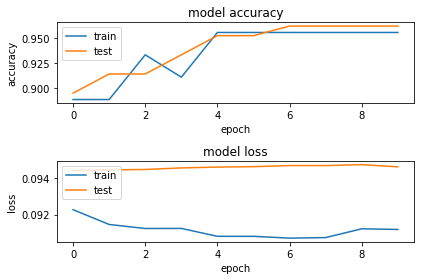

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1)
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

In [65]:
score = model.evaluate(X, Y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

150/150 [==============================] - 0s 132us/step
Test loss: 0.09339550316333771
Test accuracy: 0.9599999976158142


<h4> Problem 2 </h4>

In [68]:
data = np.array(pandas.read_table("https://www.cs.mtsu.edu/~jphillips/courses/CSCI4850-5850/public/WDBC.txt",delim_whitespace=True,header=None))

In [69]:
print(data.shape)

(568, 31)


In [70]:
X = data[:,0:30]
X.shape

(568, 30)

In [73]:
labels = data[:,30]

In [74]:
import keras

In [75]:
Y = keras.utils.to_categorical(labels,len(np.unique(labels)))
print(Y.shape)

(568, 2)


In [76]:
model = keras.Sequential()

In [77]:
input_size = X.shape[1]
output_size = Y.shape[1]
model.add(keras.layers.Dense(output_size,activation='sigmoid',input_shape=[input_size]))

In [78]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 62        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.compile(loss=keras.losses.mse,optimizer=keras.optimizers.SGD(lr=0.05),metrics=['accuracy'])

In [80]:
model.get_weights()

[array([[-0.21963508,  0.08235863],
        [-0.24390268, -0.28651336],
        [-0.32273233,  0.04278916],
        [ 0.23763302,  0.18622503],
        [ 0.10275772,  0.4031786 ],
        [ 0.17379048,  0.32699648],
        [ 0.12472776, -0.38638616],
        [ 0.09127244, -0.11566672],
        [-0.10711735,  0.1066635 ],
        [-0.40730256, -0.3511564 ],
        [ 0.3435841 , -0.34328306],
        [ 0.29436967,  0.19802317],
        [ 0.217365  ,  0.1350343 ],
        [-0.18595277,  0.33420643],
        [-0.00332808, -0.00146732],
        [-0.23134603, -0.25946328],
        [ 0.09288195,  0.36829016],
        [ 0.34103337,  0.13652983],
        [-0.05165362, -0.2957006 ],
        [ 0.01573527, -0.42108816],
        [-0.14394471,  0.36315474],
        [-0.01892534,  0.04953724],
        [ 0.112443  ,  0.12716582],
        [ 0.26906338,  0.24222323],
        [-0.07433084,  0.21387222],
        [ 0.4193202 ,  0.15005395],
        [ 0.3231363 , -0.2890553 ],
        [ 0.09068581,  0.082

In [82]:
model.predict(X[0:31,:])

array([[0.56029445, 0.5476688 ],
       [0.59629494, 0.54004794],
       [0.5067248 , 0.5289208 ],
       [0.4906607 , 0.53065133],
       [0.49457318, 0.5226373 ],
       [0.48402303, 0.52604455],
       [0.49983537, 0.553619  ],
       [0.60296357, 0.62862325],
       [0.43196186, 0.4951144 ],
       [0.45191038, 0.5472938 ],
       [0.48641577, 0.48978716],
       [0.5289009 , 0.54487103],
       [0.48711345, 0.5679239 ],
       [0.4651212 , 0.54221773],
       [0.5187801 , 0.5701978 ],
       [0.56459385, 0.57064426],
       [0.47626922, 0.5640357 ],
       [0.48191524, 0.50926363],
       [0.43974477, 0.5285816 ],
       [0.5575765 , 0.5250758 ],
       [0.5027628 , 0.5455001 ],
       [0.5318497 , 0.5925504 ],
       [0.6628148 , 0.44505554],
       [0.43423027, 0.50659007],
       [0.42621395, 0.4967944 ],
       [0.47777843, 0.54932   ],
       [0.4714012 , 0.53008527],
       [0.5707782 , 0.51106536],
       [0.5514232 , 0.5792724 ],
       [0.49021637, 0.521839  ],
       [0.

In [83]:
output_layer_neti = np.dot(np.float32(X[0:31,:]),model.get_weights()[0])+model.get_weights()[1]
output_layer_neti

array([[ 2.42357060e-01,  1.91256061e-01],
       [ 3.90050858e-01,  1.60535663e-01],
       [ 2.69006193e-02,  1.15812555e-01],
       [-3.73615026e-02,  1.22759208e-01],
       [-2.17079818e-02,  9.06111747e-02],
       [-6.39296621e-02,  1.04272589e-01],
       [-6.58564270e-04,  2.15303898e-01],
       [ 4.17828709e-01,  5.26315153e-01],
       [-2.73851186e-01, -1.95431113e-02],
       [-1.92954838e-01,  1.89742327e-01],
       [-5.43501154e-02, -4.08571213e-02],
       [ 1.15732834e-01,  1.79968297e-01],
       [-5.15574664e-02,  2.73385644e-01],
       [-1.39742225e-01,  1.69273838e-01],
       [ 7.51559213e-02,  2.82658517e-01],
       [ 2.59827375e-01,  2.84480423e-01],
       [-9.49945226e-02,  2.57557154e-01],
       [-7.23705590e-02,  3.70586962e-02],
       [-2.42197961e-01,  1.14451274e-01],
       [ 2.31332183e-01,  1.00387588e-01],
       [ 1.10512972e-02,  1.82505384e-01],
       [ 1.27571508e-01,  3.74518812e-01],
       [ 6.75863385e-01, -2.20669001e-01],
       [-2.

In [84]:
1.0 / (1.0 + np.exp(-1.0 * output_layer_neti))

array([[0.5602944 , 0.5476688 ],
       [0.59629494, 0.54004794],
       [0.5067247 , 0.5289208 ],
       [0.4906607 , 0.53065133],
       [0.49457318, 0.5226373 ],
       [0.48402303, 0.52604455],
       [0.49983537, 0.553619  ],
       [0.60296357, 0.62862325],
       [0.43196186, 0.4951144 ],
       [0.45191038, 0.5472938 ],
       [0.48641577, 0.48978716],
       [0.5289009 , 0.54487103],
       [0.48711345, 0.56792384],
       [0.4651212 , 0.54221773],
       [0.5187802 , 0.5701979 ],
       [0.56459385, 0.57064426],
       [0.47626922, 0.56403565],
       [0.48191524, 0.50926363],
       [0.43974477, 0.5285816 ],
       [0.5575765 , 0.52507585],
       [0.5027628 , 0.5455001 ],
       [0.5318497 , 0.5925504 ],
       [0.6628148 , 0.44505554],
       [0.43423027, 0.50659007],
       [0.42621395, 0.4967944 ],
       [0.47777843, 0.54932   ],
       [0.4714012 , 0.53008527],
       [0.5707782 , 0.51106536],
       [0.5514232 , 0.5792724 ],
       [0.49021637, 0.52183896],
       [0.

In [85]:
weights = model.get_weights()[0]
bias_weights = model.get_weights()[1]
print(weights)
print(bias_weights)

[[-0.21963508  0.08235863]
 [-0.24390268 -0.28651336]
 [-0.32273233  0.04278916]
 [ 0.23763302  0.18622503]
 [ 0.10275772  0.4031786 ]
 [ 0.17379048  0.32699648]
 [ 0.12472776 -0.38638616]
 [ 0.09127244 -0.11566672]
 [-0.10711735  0.1066635 ]
 [-0.40730256 -0.3511564 ]
 [ 0.3435841  -0.34328306]
 [ 0.29436967  0.19802317]
 [ 0.217365    0.1350343 ]
 [-0.18595277  0.33420643]
 [-0.00332808 -0.00146732]
 [-0.23134603 -0.25946328]
 [ 0.09288195  0.36829016]
 [ 0.34103337  0.13652983]
 [-0.05165362 -0.2957006 ]
 [ 0.01573527 -0.42108816]
 [-0.14394471  0.36315474]
 [-0.01892534  0.04953724]
 [ 0.112443    0.12716582]
 [ 0.26906338  0.24222323]
 [-0.07433084  0.21387222]
 [ 0.4193202   0.15005395]
 [ 0.3231363  -0.2890553 ]
 [ 0.09068581  0.08261248]
 [ 0.3709316  -0.30458254]
 [ 0.04432049 -0.21082339]]
[0. 0.]


In [86]:
output_neti = np.dot(np.float32(X[0:1]),weights)+bias_weights
output_neti

array([[0.24235712, 0.19125602]], dtype=float32)

In [87]:
output_acts = 1.0 / (1.0 + np.exp(-output_neti))
output_acts

array([[0.56029445, 0.5476688 ]], dtype=float32)

In [88]:
model.predict(X[0:1])

array([[0.56029445, 0.5476688 ]], dtype=float32)

In [89]:
error = output_acts - np.float32(Y[0:1])
error

array([[ 0.56029445, -0.4523312 ]], dtype=float32)

In [90]:
deriv = 2.0 * np.exp(-output_neti) / np.power(1.0+np.exp(-output_neti),2.0)
deriv

array([[0.49272916, 0.4954554 ]], dtype=float32)

In [91]:
deltas = error*deriv*(1.0/len(bias_weights))
deltas

array([[ 0.13803671, -0.11205497]], dtype=float32)

In [92]:
w_updates = np.outer(np.float32(X[0:1]),deltas)
w_updates

array([[ 0.09339944, -0.07581947],
       [ 0.08641351, -0.07014846],
       [ 0.08933941, -0.07252365],
       [ 0.05938724, -0.04820917],
       [ 0.076275  , -0.06191826],
       [ 0.04819695, -0.03912516],
       [ 0.04747842, -0.03854187],
       [ 0.05674461, -0.04606395],
       [ 0.0886795 , -0.07198794],
       [ 0.07974227, -0.0647329 ],
       [ 0.02640138, -0.02143203],
       [ 0.01875151, -0.01522204],
       [ 0.01918572, -0.01557452],
       [ 0.01467691, -0.01191437],
       [ 0.01716923, -0.01393758],
       [ 0.01877871, -0.01524412],
       [ 0.01293223, -0.01049808],
       [ 0.03137793, -0.02547186],
       [ 0.03433871, -0.02787535],
       [ 0.01543662, -0.01253108],
       [ 0.09406719, -0.07636154],
       [ 0.08473347, -0.06878465],
       [ 0.08401995, -0.06820542],
       [ 0.05266422, -0.04275158],
       [ 0.07745185, -0.0628736 ],
       [ 0.04182852, -0.03395541],
       [ 0.06345057, -0.05150769],
       [ 0.09278344, -0.07531942],
       [ 0.08226471,

In [93]:
eta = np.float32(0.05)

In [94]:
weights

array([[-0.21963508,  0.08235863],
       [-0.24390268, -0.28651336],
       [-0.32273233,  0.04278916],
       [ 0.23763302,  0.18622503],
       [ 0.10275772,  0.4031786 ],
       [ 0.17379048,  0.32699648],
       [ 0.12472776, -0.38638616],
       [ 0.09127244, -0.11566672],
       [-0.10711735,  0.1066635 ],
       [-0.40730256, -0.3511564 ],
       [ 0.3435841 , -0.34328306],
       [ 0.29436967,  0.19802317],
       [ 0.217365  ,  0.1350343 ],
       [-0.18595277,  0.33420643],
       [-0.00332808, -0.00146732],
       [-0.23134603, -0.25946328],
       [ 0.09288195,  0.36829016],
       [ 0.34103337,  0.13652983],
       [-0.05165362, -0.2957006 ],
       [ 0.01573527, -0.42108816],
       [-0.14394471,  0.36315474],
       [-0.01892534,  0.04953724],
       [ 0.112443  ,  0.12716582],
       [ 0.26906338,  0.24222323],
       [-0.07433084,  0.21387222],
       [ 0.4193202 ,  0.15005395],
       [ 0.3231363 , -0.2890553 ],
       [ 0.09068581,  0.08261248],
       [ 0.3709316 ,

In [95]:
weights - eta*w_updates

array([[-0.22430506,  0.0861496 ],
       [-0.24822336, -0.28300592],
       [-0.3271993 ,  0.04641534],
       [ 0.23466365,  0.18863548],
       [ 0.09894397,  0.40627453],
       [ 0.17138064,  0.32895273],
       [ 0.12235384, -0.38445905],
       [ 0.08843521, -0.11336352],
       [-0.11155133,  0.11026289],
       [-0.41128966, -0.34791976],
       [ 0.34226403, -0.34221146],
       [ 0.2934321 ,  0.19878428],
       [ 0.2164057 ,  0.13581301],
       [-0.18668662,  0.33480215],
       [-0.00418655, -0.00077044],
       [-0.23228496, -0.2587011 ],
       [ 0.09223533,  0.36881506],
       [ 0.3394645 ,  0.13780342],
       [-0.05337056, -0.29430684],
       [ 0.01496344, -0.4204616 ],
       [-0.14864807,  0.3669728 ],
       [-0.02316201,  0.05297647],
       [ 0.10824201,  0.13057609],
       [ 0.26643017,  0.2443608 ],
       [-0.07820343,  0.2170159 ],
       [ 0.41722876,  0.15175171],
       [ 0.31996378, -0.2864799 ],
       [ 0.08604664,  0.08637846],
       [ 0.36681837,

In [96]:
bias_weights

array([0., 0.], dtype=float32)

In [97]:
bias_weights - eta*deltas

array([[-0.00690184,  0.00560275]], dtype=float32)

In [98]:
history = model.fit(X[0:1],Y[0:1],batch_size=1,epochs=1,verbose=0)
model.get_weights()

[array([[-0.22430505,  0.0861496 ],
        [-0.24822336, -0.28300592],
        [-0.3271993 ,  0.04641534],
        [ 0.23466365,  0.18863548],
        [ 0.09894397,  0.40627453],
        [ 0.17138064,  0.32895273],
        [ 0.12235384, -0.38445905],
        [ 0.08843521, -0.11336352],
        [-0.11155133,  0.11026289],
        [-0.41128966, -0.34791976],
        [ 0.34226403, -0.34221146],
        [ 0.2934321 ,  0.19878428],
        [ 0.2164057 ,  0.13581301],
        [-0.18668662,  0.33480215],
        [-0.00418655, -0.00077044],
        [-0.23228496, -0.2587011 ],
        [ 0.09223533,  0.36881506],
        [ 0.3394645 ,  0.13780342],
        [-0.05337056, -0.29430684],
        [ 0.01496344, -0.4204616 ],
        [-0.14864807,  0.3669728 ],
        [-0.02316201,  0.05297647],
        [ 0.10824201,  0.13057609],
        [ 0.26643017,  0.2443608 ],
        [-0.07820343,  0.2170159 ],
        [ 0.41722876,  0.15175171],
        [ 0.31996378, -0.2864799 ],
        [ 0.08604664,  0.086

In [99]:
batch_size = 63
epochs = 100
validation_split = 0.5
history = model.fit(X, Y,
batch_size = batch_size,
epochs = epochs,
verbose = 1,
validation_split = validation_split)

Train on 284 samples, validate on 284 samples
Epoch 1/100
284/284 [==============================] - 0s 288us/step - loss: 0.2671 - acc: 0.2923 - val_loss: 0.2693 - val_acc: 0.2535
Epoch 2/100
284/284 [==============================] - 0s 58us/step - loss: 0.2628 - acc: 0.3063 - val_loss: 0.2680 - val_acc: 0.2641
Epoch 3/100
284/284 [==============================] - 0s 57us/step - loss: 0.2592 - acc: 0.3063 - val_loss: 0.2669 - val_acc: 0.2923
Epoch 4/100
284/284 [==============================] - 0s 56us/step - loss: 0.2557 - acc: 0.4049 - val_loss: 0.2661 - val_acc: 0.3556
Epoch 5/100
284/284 [==============================] - 0s 82us/step - loss: 0.2528 - acc: 0.5352 - val_loss: 0.2654 - val_acc: 0.4613
Epoch 6/100
284/284 [==============================] - 0s 85us/step - loss: 0.2502 - acc: 0.6092 - val_loss: 0.2649 - val_acc: 0.5176
Epoch 7/100
284/284 [==============================] - 0s 47us/step - loss: 0.2479 - acc: 0.6585 - val_loss: 0.2645 - val_acc: 0.5528
Epoch 8/100
284

In [100]:
batch_size = 63
epochs = 100
validation_split = 0.5
# Train the model and record the training
# history for later examination
history = model.fit(X, Y,
batch_size = batch_size,
epochs = epochs,
verbose = 1,
validation_split = validation_split)

Train on 284 samples, validate on 284 samples
Epoch 1/100
284/284 [==============================] - 0s 111us/step - loss: 0.1916 - acc: 0.7007 - val_loss: 0.2154 - val_acc: 0.6197
Epoch 2/100
284/284 [==============================] - 0s 103us/step - loss: 0.1912 - acc: 0.7007 - val_loss: 0.2148 - val_acc: 0.6197
Epoch 3/100
284/284 [==============================] - 0s 71us/step - loss: 0.1909 - acc: 0.7007 - val_loss: 0.2142 - val_acc: 0.6232
Epoch 4/100
284/284 [==============================] - 0s 102us/step - loss: 0.1904 - acc: 0.7007 - val_loss: 0.2136 - val_acc: 0.6268
Epoch 5/100
284/284 [==============================] - 0s 134us/step - loss: 0.1900 - acc: 0.7042 - val_loss: 0.2131 - val_acc: 0.6268
Epoch 6/100
284/284 [==============================] - 0s 81us/step - loss: 0.1896 - acc: 0.7042 - val_loss: 0.2126 - val_acc: 0.6268
Epoch 7/100
284/284 [==============================] - 0s 181us/step - loss: 0.1892 - acc: 0.7042 - val_loss: 0.2120 - val_acc: 0.6268
Epoch 8/100

In [101]:
batch_size = 63
epochs = 50
validation_split = 0.5
history = model.fit(X, Y,
batch_size = batch_size,
epochs = epochs,
verbose = 1,
validation_split = validation_split)

Train on 284 samples, validate on 284 samples
Epoch 1/50
284/284 [==============================] - 0s 126us/step - loss: 0.1582 - acc: 0.8169 - val_loss: 0.1716 - val_acc: 0.7923
Epoch 2/50
284/284 [==============================] - 0s 95us/step - loss: 0.1580 - acc: 0.8204 - val_loss: 0.1714 - val_acc: 0.7923
Epoch 3/50
284/284 [==============================] - 0s 88us/step - loss: 0.1577 - acc: 0.8204 - val_loss: 0.1711 - val_acc: 0.7923
Epoch 4/50
284/284 [==============================] - 0s 121us/step - loss: 0.1575 - acc: 0.8204 - val_loss: 0.1707 - val_acc: 0.7923
Epoch 5/50
284/284 [==============================] - 0s 150us/step - loss: 0.1572 - acc: 0.8204 - val_loss: 0.1704 - val_acc: 0.7958
Epoch 6/50
284/284 [==============================] - 0s 156us/step - loss: 0.1570 - acc: 0.8204 - val_loss: 0.1699 - val_acc: 0.7958
Epoch 7/50
284/284 [==============================] - 0s 124us/step - loss: 0.1566 - acc: 0.8204 - val_loss: 0.1695 - val_acc: 0.7993
Epoch 8/50
284/284

In [102]:
batch_size = 63
epochs = 50
validation_split = 0.5
history = model.fit(X, Y,
batch_size = batch_size,
epochs = epochs,
verbose = 1,
validation_split = validation_split)

Train on 284 samples, validate on 284 samples
Epoch 1/50
284/284 [==============================] - 0s 113us/step - loss: 0.1464 - acc: 0.8486 - val_loss: 0.1563 - val_acc: 0.8415
Epoch 2/50
284/284 [==============================] - 0s 83us/step - loss: 0.1462 - acc: 0.8486 - val_loss: 0.1560 - val_acc: 0.8415
Epoch 3/50
284/284 [==============================] - 0s 59us/step - loss: 0.1460 - acc: 0.8486 - val_loss: 0.1557 - val_acc: 0.8415
Epoch 4/50
284/284 [==============================] - 0s 89us/step - loss: 0.1458 - acc: 0.8486 - val_loss: 0.1554 - val_acc: 0.8415
Epoch 5/50
284/284 [==============================] - 0s 79us/step - loss: 0.1455 - acc: 0.8486 - val_loss: 0.1552 - val_acc: 0.8415
Epoch 6/50
284/284 [==============================] - 0s 128us/step - loss: 0.1453 - acc: 0.8486 - val_loss: 0.1549 - val_acc: 0.8415
Epoch 7/50
284/284 [==============================] - 0s 126us/step - loss: 0.1451 - acc: 0.8486 - val_loss: 0.1547 - val_acc: 0.8415
Epoch 8/50
284/284 [

In [103]:
batch_size = 63
epochs = 100
validation_split = 0.5
history = model.fit(X, Y,
batch_size = batch_size,
epochs = epochs,
verbose = 1,
validation_split = validation_split)

Train on 284 samples, validate on 284 samples
Epoch 1/100
284/284 [==============================] - 0s 120us/step - loss: 0.1369 - acc: 0.8803 - val_loss: 0.1441 - val_acc: 0.8662
Epoch 2/100
284/284 [==============================] - 0s 95us/step - loss: 0.1367 - acc: 0.8803 - val_loss: 0.1439 - val_acc: 0.8662
Epoch 3/100
284/284 [==============================] - 0s 125us/step - loss: 0.1365 - acc: 0.8803 - val_loss: 0.1438 - val_acc: 0.8662
Epoch 4/100
284/284 [==============================] - 0s 107us/step - loss: 0.1363 - acc: 0.8803 - val_loss: 0.1436 - val_acc: 0.8662
Epoch 5/100
284/284 [==============================] - 0s 179us/step - loss: 0.1362 - acc: 0.8803 - val_loss: 0.1435 - val_acc: 0.8662
Epoch 6/100
284/284 [==============================] - 0s 82us/step - loss: 0.1360 - acc: 0.8803 - val_loss: 0.1433 - val_acc: 0.8662
Epoch 7/100
284/284 [==============================] - 0s 123us/step - loss: 0.1358 - acc: 0.8803 - val_loss: 0.1431 - val_acc: 0.8662
Epoch 8/100

In [104]:
batch_size = 63
epochs = 50
validation_split = 0.7
history = model.fit(X, Y,
batch_size = batch_size,
epochs = epochs,
verbose = 1,
validation_split = validation_split)

Train on 170 samples, validate on 398 samples
Epoch 1/50
170/170 [==============================] - 0s 132us/step - loss: 0.1240 - acc: 0.8941 - val_loss: 0.1248 - val_acc: 0.8744
Epoch 2/50
170/170 [==============================] - 0s 67us/step - loss: 0.1240 - acc: 0.8941 - val_loss: 0.1247 - val_acc: 0.8744
Epoch 3/50
170/170 [==============================] - 0s 73us/step - loss: 0.1238 - acc: 0.8941 - val_loss: 0.1247 - val_acc: 0.8744
Epoch 4/50
170/170 [==============================] - 0s 78us/step - loss: 0.1238 - acc: 0.8941 - val_loss: 0.1246 - val_acc: 0.8744
Epoch 5/50
170/170 [==============================] - 0s 128us/step - loss: 0.1237 - acc: 0.8941 - val_loss: 0.1246 - val_acc: 0.8744
Epoch 6/50
170/170 [==============================] - 0s 86us/step - loss: 0.1236 - acc: 0.8941 - val_loss: 0.1245 - val_acc: 0.8744
Epoch 7/50
170/170 [==============================] - 0s 85us/step - loss: 0.1235 - acc: 0.8941 - val_loss: 0.1244 - val_acc: 0.8744
Epoch 8/50
170/170 [=

In [107]:
batch_size = 63
epochs = 50
validation_split = 0.7
history = model.fit(X, Y,
batch_size = batch_size,
epochs = epochs,
verbose = 1,
validation_split = validation_split)

Train on 170 samples, validate on 398 samples
Epoch 1/50
170/170 [==============================] - 0s 150us/step - loss: 0.1205 - acc: 0.8941 - val_loss: 0.1216 - val_acc: 0.8719
Epoch 2/50
170/170 [==============================] - 0s 110us/step - loss: 0.1204 - acc: 0.9000 - val_loss: 0.1216 - val_acc: 0.8719
Epoch 3/50
170/170 [==============================] - 0s 92us/step - loss: 0.1204 - acc: 0.9000 - val_loss: 0.1215 - val_acc: 0.8744
Epoch 4/50
170/170 [==============================] - 0s 97us/step - loss: 0.1203 - acc: 0.9000 - val_loss: 0.1214 - val_acc: 0.8744
Epoch 5/50
170/170 [==============================] - 0s 173us/step - loss: 0.1202 - acc: 0.9000 - val_loss: 0.1213 - val_acc: 0.8744
Epoch 6/50
170/170 [==============================] - 0s 204us/step - loss: 0.1202 - acc: 0.9000 - val_loss: 0.1213 - val_acc: 0.8744
Epoch 7/50
170/170 [==============================] - 0s 196us/step - loss: 0.1201 - acc: 0.9000 - val_loss: 0.1212 - val_acc: 0.8744
Epoch 8/50
170/170

In [108]:
batch_size = 63
epochs = 50
validation_split = 0.4
history = model.fit(X, Y,
batch_size = batch_size,
epochs = epochs,
verbose = 1,
validation_split = validation_split)

Train on 340 samples, validate on 228 samples
Epoch 1/50
340/340 [==============================] - 0s 120us/step - loss: 0.1192 - acc: 0.8706 - val_loss: 0.1157 - val_acc: 0.8991
Epoch 2/50
340/340 [==============================] - 0s 79us/step - loss: 0.1190 - acc: 0.8735 - val_loss: 0.1154 - val_acc: 0.8991
Epoch 3/50
340/340 [==============================] - 0s 99us/step - loss: 0.1188 - acc: 0.8735 - val_loss: 0.1152 - val_acc: 0.8991
Epoch 4/50
340/340 [==============================] - 0s 69us/step - loss: 0.1187 - acc: 0.8735 - val_loss: 0.1150 - val_acc: 0.8991
Epoch 5/50
340/340 [==============================] - 0s 128us/step - loss: 0.1186 - acc: 0.8735 - val_loss: 0.1147 - val_acc: 0.9035
Epoch 6/50
340/340 [==============================] - 0s 158us/step - loss: 0.1184 - acc: 0.8735 - val_loss: 0.1144 - val_acc: 0.9035
Epoch 7/50
340/340 [==============================] - 0s 100us/step - loss: 0.1183 - acc: 0.8735 - val_loss: 0.1141 - val_acc: 0.9035
Epoch 8/50
340/340 

In [109]:
batch_size = 63
epochs = 50
validation_split = 0.5
history = model.fit(X, Y,
batch_size = batch_size,
epochs = epochs,
verbose = 1,
validation_split = validation_split)

Train on 284 samples, validate on 284 samples
Epoch 1/50
284/284 [==============================] - 0s 164us/step - loss: 0.1107 - acc: 0.8979 - val_loss: 0.1109 - val_acc: 0.9120
Epoch 2/50
284/284 [==============================] - 0s 137us/step - loss: 0.1106 - acc: 0.9014 - val_loss: 0.1109 - val_acc: 0.9085
Epoch 3/50
284/284 [==============================] - 0s 212us/step - loss: 0.1105 - acc: 0.8944 - val_loss: 0.1109 - val_acc: 0.9049
Epoch 4/50
284/284 [==============================] - 0s 136us/step - loss: 0.1104 - acc: 0.8944 - val_loss: 0.1108 - val_acc: 0.9049
Epoch 5/50
284/284 [==============================] - 0s 113us/step - loss: 0.1104 - acc: 0.8944 - val_loss: 0.1108 - val_acc: 0.9049
Epoch 6/50
284/284 [==============================] - 0s 111us/step - loss: 0.1103 - acc: 0.8944 - val_loss: 0.1107 - val_acc: 0.9049
Epoch 7/50
284/284 [==============================] - 0s 110us/step - loss: 0.1102 - acc: 0.8944 - val_loss: 0.1106 - val_acc: 0.9049
Epoch 8/50
284/2

In [110]:
batch_size = 63
epochs = 50
validation_split = 0.7
history = model.fit(X, Y,
batch_size = batch_size,
epochs = epochs,
verbose = 1,
validation_split = validation_split)

Train on 170 samples, validate on 398 samples
Epoch 1/50
170/170 [==============================] - 0s 152us/step - loss: 0.1084 - acc: 0.9059 - val_loss: 0.1063 - val_acc: 0.8995
Epoch 2/50
170/170 [==============================] - 0s 159us/step - loss: 0.1083 - acc: 0.9059 - val_loss: 0.1063 - val_acc: 0.8970
Epoch 3/50
170/170 [==============================] - 0s 142us/step - loss: 0.1083 - acc: 0.9059 - val_loss: 0.1062 - val_acc: 0.8970
Epoch 4/50
170/170 [==============================] - 0s 181us/step - loss: 0.1082 - acc: 0.9059 - val_loss: 0.1062 - val_acc: 0.8970
Epoch 5/50
170/170 [==============================] - 0s 200us/step - loss: 0.1081 - acc: 0.9059 - val_loss: 0.1062 - val_acc: 0.8970
Epoch 6/50
170/170 [==============================] - 0s 153us/step - loss: 0.1081 - acc: 0.9059 - val_loss: 0.1062 - val_acc: 0.8970
Epoch 7/50
170/170 [==============================] - 0s 361us/step - loss: 0.1080 - acc: 0.9059 - val_loss: 0.1062 - val_acc: 0.8970
Epoch 8/50
170/1

In [112]:
batch_size = 63
epochs = 50
validation_split = 0.8
history = model.fit(X, Y,
batch_size = batch_size,
epochs = epochs,
verbose = 1,
validation_split = validation_split)

Train on 113 samples, validate on 455 samples
Epoch 1/50
113/113 [==============================] - 0s 429us/step - loss: 0.1077 - acc: 0.8850 - val_loss: 0.1048 - val_acc: 0.8967
Epoch 2/50
113/113 [==============================] - 0s 188us/step - loss: 0.1077 - acc: 0.8850 - val_loss: 0.1048 - val_acc: 0.8967
Epoch 3/50
113/113 [==============================] - 0s 199us/step - loss: 0.1077 - acc: 0.8850 - val_loss: 0.1047 - val_acc: 0.8967
Epoch 4/50
113/113 [==============================] - 0s 346us/step - loss: 0.1077 - acc: 0.8850 - val_loss: 0.1047 - val_acc: 0.8967
Epoch 5/50
113/113 [==============================] - 0s 560us/step - loss: 0.1076 - acc: 0.8850 - val_loss: 0.1047 - val_acc: 0.8967
Epoch 6/50
113/113 [==============================] - 0s 534us/step - loss: 0.1076 - acc: 0.8850 - val_loss: 0.1047 - val_acc: 0.8967
Epoch 7/50
113/113 [==============================] - 0s 276us/step - loss: 0.1076 - acc: 0.8850 - val_loss: 0.1046 - val_acc: 0.8967
Epoch 8/50
113/1

In [114]:
batch_size = 63
epochs = 50
validation_split = 0.6
history = model.fit(X, Y,
batch_size = batch_size,
epochs = epochs,
verbose = 1,
validation_split = validation_split)

Train on 227 samples, validate on 341 samples
Epoch 1/50
227/227 [==============================] - 0s 120us/step - loss: 0.1056 - acc: 0.8899 - val_loss: 0.1030 - val_acc: 0.9032
Epoch 2/50
227/227 [==============================] - 0s 79us/step - loss: 0.1056 - acc: 0.8899 - val_loss: 0.1029 - val_acc: 0.9032
Epoch 3/50
227/227 [==============================] - 0s 68us/step - loss: 0.1055 - acc: 0.8899 - val_loss: 0.1028 - val_acc: 0.9032
Epoch 4/50
227/227 [==============================] - 0s 75us/step - loss: 0.1054 - acc: 0.8899 - val_loss: 0.1026 - val_acc: 0.9032
Epoch 5/50
227/227 [==============================] - 0s 132us/step - loss: 0.1054 - acc: 0.8899 - val_loss: 0.1026 - val_acc: 0.9032
Epoch 6/50
227/227 [==============================] - 0s 76us/step - loss: 0.1053 - acc: 0.8899 - val_loss: 0.1025 - val_acc: 0.9032
Epoch 7/50
227/227 [==============================] - 0s 76us/step - loss: 0.1053 - acc: 0.8899 - val_loss: 0.1025 - val_acc: 0.9032
Epoch 8/50
227/227 [=

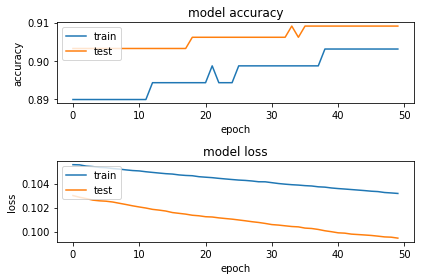

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1)
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

In [116]:
score = model.evaluate(X, Y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

568/568 [==============================] - 0s 95us/step
Test loss: 0.10093047553804559
Test accuracy: 0.9066901408450704
